<a href="https://colab.research.google.com/github/Sanjesh12/Scaler_Data_Science_projects/blob/main/Business_Case_Delhivery_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Case: Delhivery - Feature Engineering

In [134]:
# Importing libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reading csv file
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
# Loading data.
df = pd.read_csv('/content/drive/My Drive/Scaler case study/Data Analyst Project/Root Cause Analysis Project/(RCA)_delhivery_data.txt')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [136]:
# Shape of data
df.shape

(144867, 24)

Dataset contain total - 144867 rows and 24 Columns

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [138]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [139]:
df.drop(['route_schedule_uuid', 'is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor'], axis = 1, inplace=True)

In [140]:
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0
od_end_time,0


In [141]:
df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000
mean,961.262986,234.073372,416.927527,213.868272,284.771297,36.196111,18.507548,22.82902
std,1037.012769,344.990009,598.103621,308.011085,421.119294,53.571158,14.775960,17.86066
min,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.00000
25%,161.000000,23.355874,51.000000,27.000000,29.914700,20.000000,11.000000,12.07010
50%,449.000000,66.126571,132.000000,64.000000,78.525800,29.000000,17.000000,23.51300
75%,1634.000000,286.708875,513.000000,257.000000,343.193250,40.000000,22.000000,27.81325
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.40370


### Explotary Data Analysis

In [142]:
df.head()

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


## Analysing Data column.

In [143]:
df["data"].value_counts()

,count
data,
training,104858
test,40009


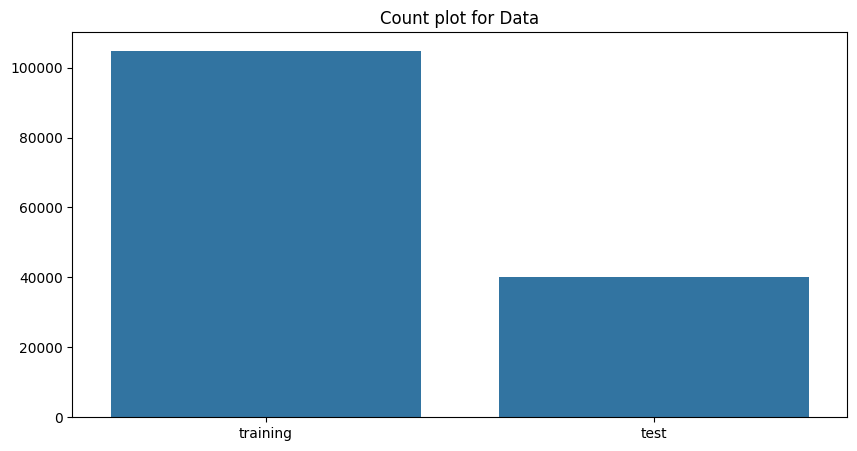

In [144]:
# Count plot for Data.

plt.figure(figsize=(10,5))
sns.countplot(x="data", data=df)
plt.title("Count plot for Data")
plt.xlabel("")
plt.ylabel("")
plt.show()

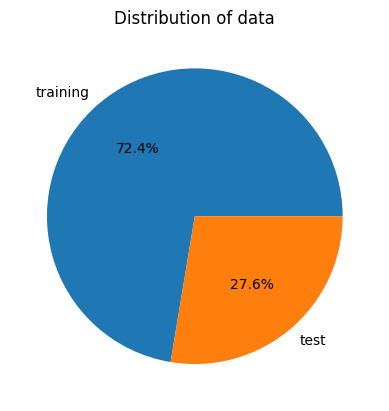

In [145]:
# creating Pi chart ddistrivution of data.
df["data"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Distribution of data")
plt.xlabel("")
plt.ylabel("")
plt.show()

## Analysing route_type column.

In [146]:
df["route_type"].value_counts()

,count
route_type,
FTL,99660
Carting,45207


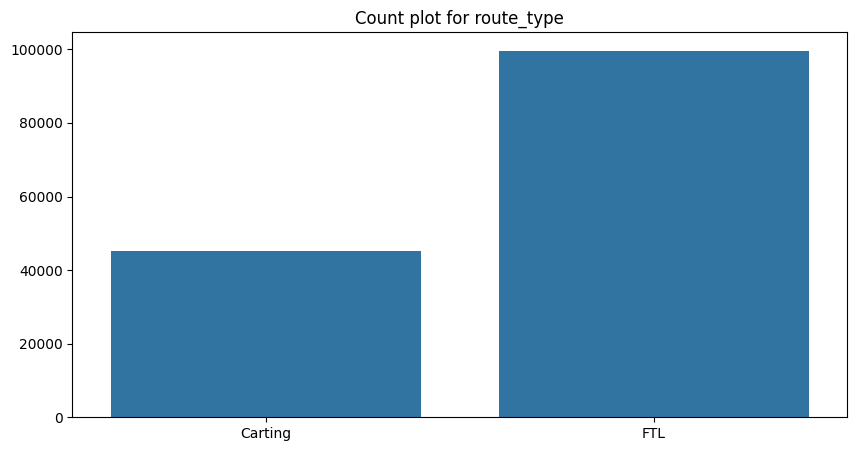

In [147]:
# Count plot for route_type.

plt.figure(figsize=(10,5))
sns.countplot(x="route_type", data=df)
plt.title("Count plot for route_type")
plt.xlabel("")
plt.ylabel("")
plt.show()

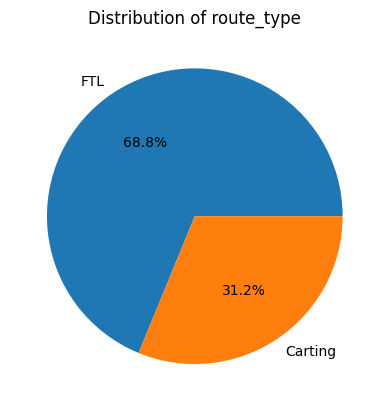

In [148]:
# creating Pi chart for route_type.
df["route_type"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Distribution of route_type")
plt.xlabel("")
plt.ylabel("")
plt.show()

In [149]:
# changing the datatype if datetime columns.

df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"], infer_datetime_format=True)
df["od_start_time"] = pd.to_datetime(df["od_start_time"], infer_datetime_format=True)
df["od_end_time"] = pd.to_datetime(df["od_end_time"], infer_datetime_format=True)

<ipython-input-149-52949418be06>:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"], infer_datetime_format=True)
<ipython-input-149-52949418be06>:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["od_start_time"] = pd.to_datetime(df["od_start_time"], infer_datetime_format=True)
<ipython-input-149-52949418be06>:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pd

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_type                      144867 non-null  object        
 3   trip_uuid                       144867 non-null  object        
 4   source_center                   144867 non-null  object        
 5   source_name                     144574 non-null  object        
 6   destination_center              144867 non-null  object        
 7   destination_name                144606 non-null  object        
 8   od_start_time                   144867 non-null  datetime64[ns]
 9   od_end_time                     144867 non-null  datetime64[ns]
 10  start_scan_to_end_scan          144867 non-null  float64

In [151]:
df.head()

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


In [152]:
df.isna().sum()

,0
data,0
trip_creation_time,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0
od_end_time,0


In [153]:
# replacing missing source_name and destination_name with others.

df['source_name'] = df['source_name'].fillna('Others')
df['destination_name'] = df['destination_name'].fillna('Others')

In [154]:
df.isna().sum()

,0
data,0
trip_creation_time,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0
od_end_time,0


## Bi-variante Analysis


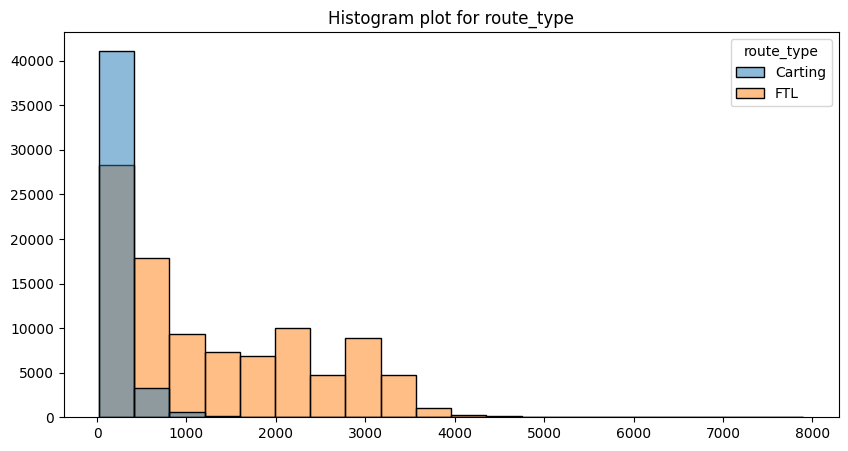

In [155]:
# creating histogram plot for hur = route_type

plt.figure(figsize=(10,5))
sns.histplot(x="start_scan_to_end_scan", data=df, hue = "route_type", bins = 20)
plt.title("Histogram plot for route_type")
plt.xlabel("")
plt.ylabel("")
plt.show()

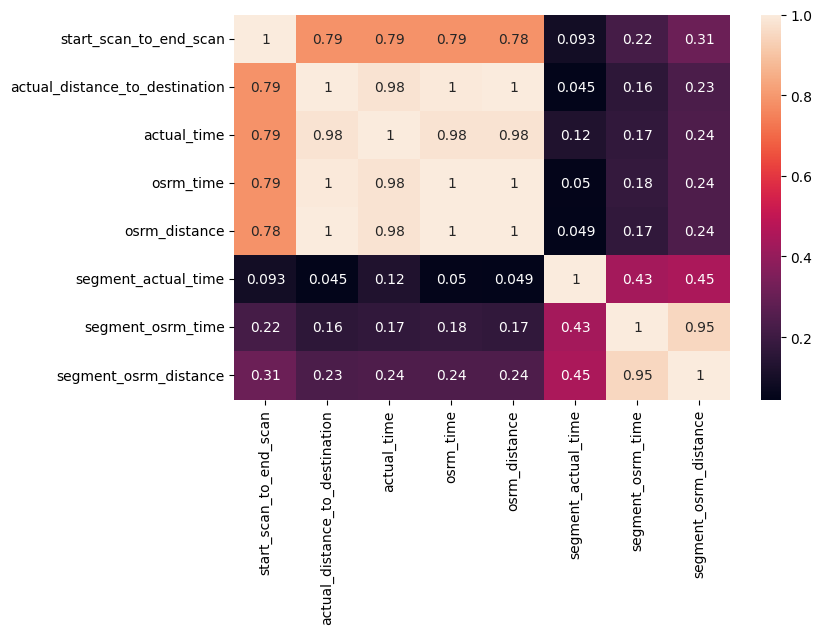

In [156]:
# Create a heatmap for correlation of numerical columns
plt.figure(figsize=(8,5))
# Calculate correlation only for numeric columns
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.show()

## 2. Merginh Columns


### Step 1: Creating the segment_key

In [157]:
# converting data types
df["trip_uuid"] = df["trip_uuid"].astype("string")
df["source_center"] = df["source_center"].astype("string")
df["destination_center"] = df["destination_center"].astype("string")

# create new concatenated column.
df['segment_key'] = df.apply(lambda x : x['trip_uuid'] + '_' + x['source_center'] + '_' + x['destination_center'], axis = 1)

### Step 2: Cumulative Summation within Each Segment

In [158]:
df['segment_actual_time_sum'] = df.groupby('segment_key')['segment_actual_time'].cumsum()
df['segment_osrm_distance_sum'] = df.groupby('segment_key')['segment_osrm_distance'].cumsum()
df['segment_osrm_time_sum'] = df.groupby('segment_key')['segment_osrm_time'].cumsum()


In [159]:
df.head()

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320_IND388121AAA_IND388620AAB,14.0,11.9653,11.0
1,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320_IND388121AAA_IND388620AAB,24.0,21.7243,20.0
2,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320_IND388121AAA_IND388620AAB,40.0,32.5395,27.0
3,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320_IND388121AAA_IND388620AAB,61.0,45.5619,39.0
4,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0


### Step 3: Aggregating at the Segment Level

In [160]:
create_segment_dict = {
    'trip_uuid': 'first',
    'source_center': 'first',
    'source_name': 'first',
    'destination_center': 'first',
    'destination_name': 'first',
    'route_type': 'first',
    'od_start_time': 'first',
    'od_end_time': 'last',  #Important to take last
    'segment_actual_time_sum': 'last',
    'segment_osrm_distance_sum': 'last',
    'segment_osrm_time_sum': 'last'
    # Add other columns here, specifying 'first', 'last', 'sum', etc.
}

segment = df.groupby('segment_key').agg(create_segment_dict)

# Reset the index to make 'segment_key' a regular column again
segment = segment.reset_index()

# Sort the DataFrame
segment = segment.sort_values(by=['segment_key', 'od_end_time'], ascending=[True, True])


In [161]:
segment

,segment_key,trip_uuid,source_center,source_name,destination_center,destination_name,route_type,od_start_time,od_end_time,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),FTL,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,728.0,670.6205,534.0
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),FTL,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,820.0,649.8528,474.0
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),Carting,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,46.0,28.1995,26.0
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),Carting,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,95.0,55.9899,39.0
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),FTL,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,608.0,317.7408,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069_IND628204AAA_IND627657AAA,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),Carting,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,49.0,42.1431,42.0
26364,trip-153861115439069069_IND628613AAA_IND627005AAA,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Carting,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,89.0,78.5869,77.0
26365,trip-153861115439069069_IND628801AAA_IND628204AAA,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),Carting,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,29.0,16.0184,14.0
26366,trip-153861118270144424_IND583119AAA_IND583101AAA,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),FTL,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,233.0,52.5303,42.0


## Step 3: Feature Engineering

### 3.1: Time Difference Calculation (od_time_diff_hour)

In [162]:
# Assuming od_start_time and od_end_time are already in datetime format
df['od_time_diff'] = df['od_end_time'] - df['od_start_time']
df['od_time_diff_hour'] = df['od_time_diff'].dt.total_seconds() / 3600  # Convert to hours
df = df.drop(['od_time_diff'], axis=1)


### 3.2: Destination Name Splitting

In [163]:
df['destination_city'] = df['destination_name'].str.split('_').str[0]
df['destination_place_code'] = df['destination_name'].str.split('_').str[1].str.split('(').str[0]
df['destination_state'] = df['destination_name'].str.split('(').str[1].str.replace(')', '')


### 3.3: Source Name Splitting

In [164]:
df['source_city'] = df['source_name'].str.split('_').str[0]
df['source_place_code'] = df['source_name'].str.split('_').str[1].str.split('(').str[0]
df['source_state'] = df['source_name'].str.split('(').str[1].str.replace(')', '')


### 3.4: Trip Creation Time Features

In [165]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time']) #Ensure it is datetime
df['trip_creation_month'] = df['trip_creation_time'].dt.month_name()
df['trip_creation_year'] = df['trip_creation_time'].dt.year
df['trip_creation_day'] = df['trip_creation_time'].dt.day
df['trip_creation_hour'] = df['trip_creation_time'].dt.hour
df['trip_creation_dayofweek'] = df['trip_creation_time'].dt.dayofweek  # 0=Monday, 6=Sunday


## 4. In-depth Analysis

### 4.1: Grouping and Aggregating at Trip-Level

In [166]:
create_trip_dict = {
    'source_center': 'first',
    'destination_center': 'first',
    'route_type': 'first',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'segment_actual_time_sum': 'sum',
    'segment_osrm_distance_sum': 'sum',
    'segment_actual_time_sum': 'sum'
    # Add other columns here, specifying 'first', 'last', 'sum', etc.
}

trip = segment.groupby('trip_uuid').agg(create_trip_dict)
trip = trip.reset_index()


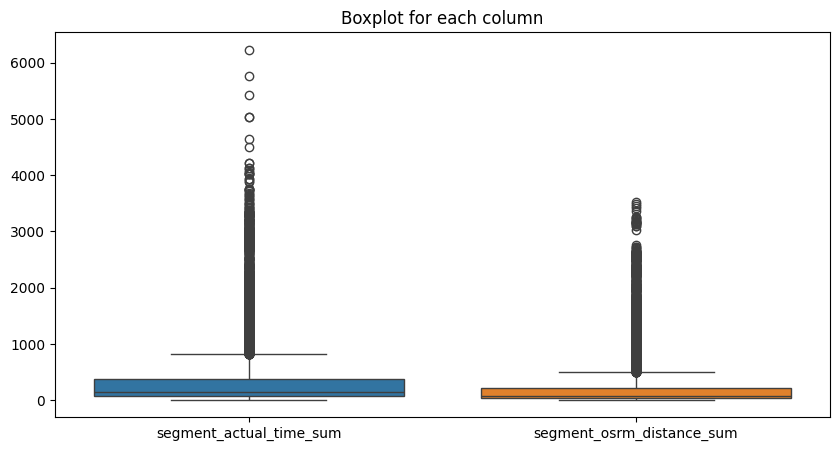

In [167]:
# creating Boxplot for each column.
plt.figure(figsize=(10,5))
sns.boxplot(data=trip)
plt.title("Boxplot for each column")
plt.xlabel("")
plt.ylabel("")
plt.show()

### 4.2: Outlier Detection & Treatment

In [168]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Example usage (assuming 'trip' DataFrame from 4.1)
trip1 = remove_outliers_iqr(trip, 'segment_actual_time_sum')
trip1 = remove_outliers_iqr(trip, 'segment_osrm_distance_sum')


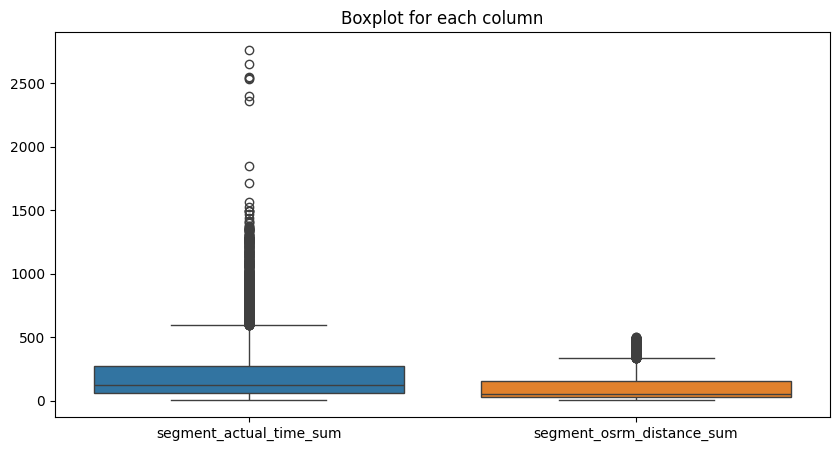

In [169]:
# creating Boxplot for each column.
plt.figure(figsize=(10,5))
sns.boxplot(data=trip1) # Change df_filtered to trip1
plt.title("Boxplot for each column")
plt.xlabel("")
plt.ylabel("")
plt.show()

<Axes: xlabel='segment_actual_time_sum', ylabel='segment_osrm_distance_sum'>

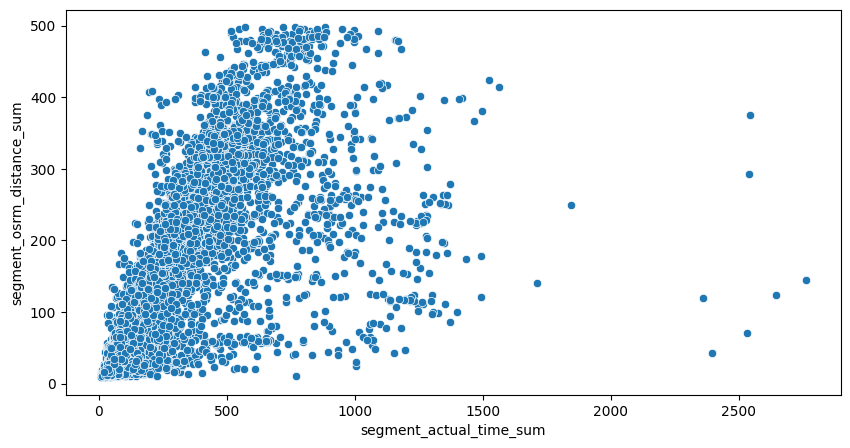

In [170]:
# plotting scatter plot for trip1
plt.figure(figsize=(10,5))
sns.scatterplot(data=trip1, x='segment_actual_time_sum', y='segment_osrm_distance_sum')

### 4.3: One-Hot Encoding of Categorical Features

In [171]:
trip2 = pd.get_dummies(trip, columns=['route_type', 'source_center', 'destination_center'])


### 4.4: Normalization/Standardization of Numerical Features

In [178]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# The columns 'actual_distance_to_destination', 'actual_time', 'osrm_distance', 'osrm_time'
# are not present in your 'trip' dataframe.
# Replace these with the correct numerical column names you want to scale.
# For example, it could be segment_actual_time_sum', 'segment_osrm_distance_sum','segment_osrm_time_sum'
# Based on the available columns from your code.
numerical_cols = ['segment_actual_time_sum', 'segment_osrm_distance_sum']  #List all numerical columns you want to scale, Removed 'segment_osrm_time_sum' as it is not present in trip dataframe

trip[numerical_cols] = scaler.fit_transform(trip[numerical_cols]) # Scaling only for numerical_cols present in trip dataframe.


In [182]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['segment_actual_time_sum', 'segment_osrm_distance_sum'] #List all numerical columns

trip[numerical_cols] = scaler.fit_transform(trip[numerical_cols])


In [183]:
trip[numerical_cols]


,segment_actual_time_sum,segment_osrm_distance_sum
0,2.146791,2.633784
1,-0.382742,-0.333670
2,5.310954,5.573660
3,-0.530163,-0.488040
4,-0.024976,-0.183405
...,...,...
14812,-0.488813,-0.380078
14813,-0.598480,-0.497133
14814,-0.131047,-0.283991
14815,-0.172397,0.000795


In [174]:
trip2

,trip_uuid,od_start_time,od_end_time,segment_actual_time_sum,segment_osrm_distance_sum,route_type_Carting,route_type_FTL,source_center_IND000000AAL,source_center_IND000000AAQ,source_center_IND000000AAS,...,destination_center_IND851204AAA,destination_center_IND852118A1B,destination_center_IND852118AAA,destination_center_IND852139AAB,destination_center_IND852201AAA,destination_center_IND853204AAA,destination_center_IND854105AAB,destination_center_IND854311AAA,destination_center_IND854326AAB,destination_center_IND854335AAA
0,trip-153671041653548748,2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,1548.0,1320.4733,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,trip-153671042288605164,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,141.0,84.1894,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,trip-153671043369099517,2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,3308.0,2545.2678,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,trip-153671046011330457,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,59.0,19.8766,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,trip-153671052974046625,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,340.0,146.7919,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,82.0,64.8551,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14813,trip-153861104386292051,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,21.0,16.0883,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14814,trip-153861106442901555,2018-10-04 02:51:27.075797,2018-10-04 02:51:27.075797,281.0,104.8866,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14815,trip-153861115439069069,2018-10-03 23:59:14.390954,2018-10-04 02:29:04.272194,258.0,223.5324,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [173]:
df.head()

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,destination_place_code,destination_state,source_city,source_place_code,source_state,trip_creation_month,trip_creation_year,trip_creation_day,trip_creation_hour,trip_creation_dayofweek
0,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,MotvdDPP,Gujarat,Anand,VUNagar,Gujarat,September,2018,20,2,3
1,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,MotvdDPP,Gujarat,Anand,VUNagar,Gujarat,September,2018,20,2,3
2,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,MotvdDPP,Gujarat,Anand,VUNagar,Gujarat,September,2018,20,2,3
3,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,MotvdDPP,Gujarat,Anand,VUNagar,Gujarat,September,2018,20,2,3
4,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,MotvdDPP,Gujarat,Anand,VUNagar,Gujarat,September,2018,20,2,3
